In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from neural_network import *
from keras.callbacks import ModelCheckpoint
import os

In [2]:
def get_data(dataframe): #-> Tuple[tf.data.Dataset, tf.data.Dataset]:
  training_data, testing_data = train_test_split(dataframe, test_size=0.2, random_state=25)
  training_data = training_data.to_numpy()
  testing_data = testing_data.to_numpy()
  return (training_data, testing_data)

In [3]:
data_directory = './data'
training_ds_prep_file_name = 'training_ds_prepared.csv'
training_ds_prep_df = pd.read_csv(f'{data_directory}/{training_ds_prep_file_name}')

In [4]:
training_ds_prep_df.cov()[['Nivel de Adaptación_Alto','Nivel de Adaptación_Bajo','Nivel de Adaptación_Moderado']]

,Nivel de Adaptación_Alto,Nivel de Adaptación_Bajo,Nivel de Adaptación_Moderado
Estudiante de Tecnología,0.007865,-0.028341,0.020477
Vive en Ciudad,0.010738,-0.049405,0.038667
Tipo de Red_2G,-0.001373,0.007327,-0.005954
Tipo de Red_3G,-0.008623,0.015367,-0.006744
Tipo de Red_4G,0.009996,-0.022694,0.012698
Nivel de Educación_Colegio,-0.012908,0.030793,-0.017885
Nivel de Educación_Escuela,0.002042,-0.021217,0.019174
Nivel de Educación_Universidad,0.010866,-0.009576,-0.001289
Tipo de Instituto_Privado,0.007922,-0.067838,0.059916
Tipo de Instituto_Público,-0.007922,0.067838,-0.059916


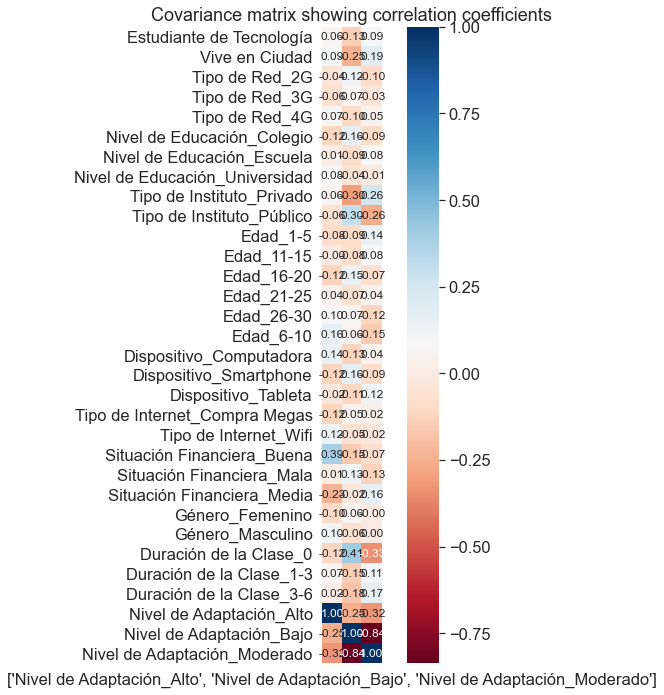

In [17]:
cols = training_ds_prep_df.columns
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(training_ds_prep_df.corr()[['Nivel de Adaptación_Alto','Nivel de Adaptación_Bajo','Nivel de Adaptación_Moderado']].values,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='RdBu',                 
                 yticklabels=cols,
                 xticklabels=[['Nivel de Adaptación_Alto','Nivel de Adaptación_Bajo','Nivel de Adaptación_Moderado']])
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()